In [2]:
# 지역의 병원 수를 리스트로 저장한 후 배열로 출력해보자

import numpy as np

내과 = [79, 60, 50, 31]
외과 = [25, 8, 6, 3]
정형외과 = [28, 28, 26, 17]
소아청소년과 = [28, 28, 25, 23]
안과 = [68, 18, 15, 14]

병원수 = np.array([내과, 외과, 정형외과, 소아청소년과, 안과])

print(병원수)

print(병원수.shape) # 5행 4열의 데이터임을 확인

[[79 60 50 31]
 [25  8  6  3]
 [28 28 26 17]
 [28 28 25 23]
 [68 18 15 14]]
(5, 4)


In [3]:

# pandas와 numpy를 이용해서 "데이터 전처리"부터 "시각화"까지 단계적으로 실습해본다

# 타이타닉호의 침몰사고 데이터를 이용한다

In [1]:
# 전처리 과정부터 시작

import pandas as pd

titanic = pd.read_csv("train.csv")

print(f"데이터프레임의 크기 : {titanic.shape} \n\n") # 행과 열의 크기를 알려 줌

print(f"titanic 데이터프레임의 정보 : \n"); titanic.info() # 행과 열의 구성정보를 알려줌

데이터프레임의 크기 : (891, 12) 


titanic 데이터프레임의 정보 : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 데이터프레임의 정보 간략히 보기

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 속성과 인덱스 정보 확인

print("df의 속성명\n")
print(titanic.columns)

print()

print("df의 인덱스 정보\n")
print(titanic.index) # 1개씩 촉 891개 있는 것 확인

df의 속성명

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

df의 인덱스 정보

RangeIndex(start=0, stop=891, step=1)


In [10]:
print("df의 속성병 유니크값 개수\n")

titanic.nunique() # 위의 정보와 혼합하여, PassengetId를 PK로 잡을 수 있겠다는 것 확인

df의 속성병 유니크값 개수



PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
# df의 속성별 데이터의 범주 확인하기

print(titanic['Survived'].unique()) # 도메인이 (0, 1) 임
print(titanic['Sex'].unique())      # 도메인이 (male, female)
print(titanic['Pclass'].unique())
print(titanic['Embarked'].unique())

[0 1]
['male' 'female']
[3 1 2]
['S' 'C' 'Q' nan]


In [16]:
# df의 통계정보와 데이터분포 확인하기

titanic.describe() # 숫자형 데이터가 아닌 것들은 제외된 것을 확인, 
                   # describe() 자체가 통계자료 출력이기때문으로 이해하면 됨

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# 결측데이터 확인하기

print(titanic.isna())

print ("\n\n합계 보기")

titanic.isna().sum()

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# 결측치 채우는 작업을 해보자
# Age는 평균값으로
# Cabin은 통계에 중요치않다고 생각하고 버리고
# Embarked는 최빈값으로 채우자

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [27]:
# Emberked의 최빈값을 찾자

titanic.groupby('Embarked')['PassengerId'].count() # 최빈값은 S로 판단

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [28]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [31]:
# 최종 확인

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [34]:
# 이제 데이터 시각화를 해보자

titanic.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

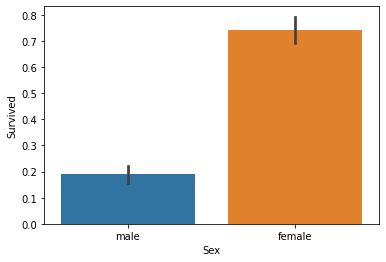

In [36]:
# seaborn은 matplotlib보다 좀 더 발전된 형태고 코드도 쉽다
# pandas와 궁합이 좋음

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Sex', y='Survived', data=titanic)

In [39]:
# Pclass속성별 생존자수 확인하기

titanic.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

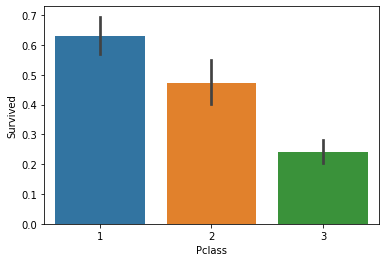

In [46]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

<Axes: xlabel='Pclass', ylabel='Survived'>

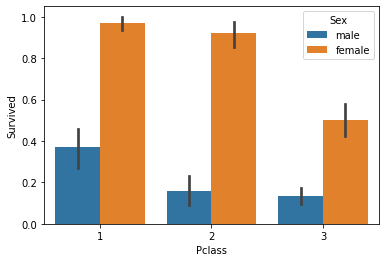

In [48]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic) # hue옵션 통해서 성별을 분리하여 보여준다

# 1,2등석에서 여자의 차이는 크지않지만 3등석에서 급격히 줄어듬
# 남자의 경우 1등석에서 생존률이 큼

In [50]:
# df의 Embarked 속성의 그룹별 생존자수 확인하기

titanic.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

<Axes: xlabel='Embarked', ylabel='Survived'>

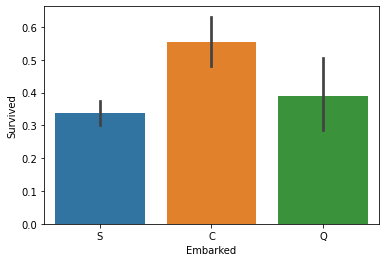

In [51]:
sns.barplot(x='Embarked', y='Survived', data=titanic)

# C에서 승선한 사람이 상대적으로 많이 생존했음을 알 수 있다.